In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#file path
csv_path = "../Resources/crimedata_33613_5y.csv"
crime_data_df = pd.read_csv(csv_path)
crime_data_df.head(10)

,OBJECTID,Case Number,Crime Type,Crime Type Extension,Reported Date,Address,zip
0,863894,2016-90596,THEFT,THEFT FROM A BUILDING,02/08/2016,14500 BLOCK VALOR CR,33613
1,864020,2016-90084,MISCHIEF,CRIMINAL MISCHIEF MISDEMEANOR,02/08/2016,1800 BLOCK BEARSS AV E,33613
2,864189,2016-93051,DRUGS,DRUGS/NARCOTICS,02/09/2016,13900 BLOCK 19TH ST N,33613
3,865806,2016-110323,BURGLARY,BURGLARY RESIDENCE / FORCED,02/16/2016,3100 BLOCK GRAND PAVILION DR,33613
4,869656,2016-146787,DRUGS,DRUGS/NARCOTICS,03/02/2016,22ND ST N / 136TH AV E,33613
5,870784,2016-157731,BURGLARY,THEFT FROM A VEHICLE,03/07/2016,4000 BLOCK ROCKY CR,33613
6,871425,2016-163612,TRAFFIC,Property Damage,03/09/2016,FLETCHER AV E / 22ND ST N,33612
7,871657,2016-167508,BURGLARY,THEFT FROM A VEHICLE,03/10/2016,13900 BLOCK GLOVER PL,33613
8,874442,2016-195705,THEFT,PETIT THEFT - ALL OTHER,03/22/2016,100 BLOCK GARLAND CT,33613
9,875444,2016-203016,DRUGS,DRUGS/NARCOTICS,03/25/2016,1500 BLOCK 140TH AV E,33613


In [2]:
#identify columns names used in the data
crime_data_df.columns

Index(['OBJECTID', 'Case Number', 'Crime Type', 'Crime Type Extension',
       'Reported Date', 'Address', 'zip'],
      dtype='object')

In [3]:
#remove some columns from the data 
reduced_crime_data_df = crime_data_df.loc[:, ['Reported Date', 'Case Number', 'Crime Type', 'Crime Type Extension'
       , 'zip']]
reduced_crime_data_df.head(10)

,Reported Date,Case Number,Crime Type,Crime Type Extension,zip
0,02/08/2016,2016-90596,THEFT,THEFT FROM A BUILDING,33613
1,02/08/2016,2016-90084,MISCHIEF,CRIMINAL MISCHIEF MISDEMEANOR,33613
2,02/09/2016,2016-93051,DRUGS,DRUGS/NARCOTICS,33613
3,02/16/2016,2016-110323,BURGLARY,BURGLARY RESIDENCE / FORCED,33613
4,03/02/2016,2016-146787,DRUGS,DRUGS/NARCOTICS,33613
5,03/07/2016,2016-157731,BURGLARY,THEFT FROM A VEHICLE,33613
6,03/09/2016,2016-163612,TRAFFIC,Property Damage,33612
7,03/10/2016,2016-167508,BURGLARY,THEFT FROM A VEHICLE,33613
8,03/22/2016,2016-195705,THEFT,PETIT THEFT - ALL OTHER,33613
9,03/25/2016,2016-203016,DRUGS,DRUGS/NARCOTICS,33613


In [4]:
#columns to use in the table below 
columns = [
    "Reported Date", "Case Number", "Crime Type", "Crime Type Extension", "zip"
]
#create a new DF for non Traffic related crimes
data_crime_no_traffic_df = reduced_crime_data_df.loc[reduced_crime_data_df["Crime Type"] != "TRAFFIC", columns]
data_crime_no_traffic_df.head(10)


,Reported Date,Case Number,Crime Type,Crime Type Extension,zip
0,02/08/2016,2016-90596,THEFT,THEFT FROM A BUILDING,33613
1,02/08/2016,2016-90084,MISCHIEF,CRIMINAL MISCHIEF MISDEMEANOR,33613
2,02/09/2016,2016-93051,DRUGS,DRUGS/NARCOTICS,33613
3,02/16/2016,2016-110323,BURGLARY,BURGLARY RESIDENCE / FORCED,33613
4,03/02/2016,2016-146787,DRUGS,DRUGS/NARCOTICS,33613
5,03/07/2016,2016-157731,BURGLARY,THEFT FROM A VEHICLE,33613
7,03/10/2016,2016-167508,BURGLARY,THEFT FROM A VEHICLE,33613
8,03/22/2016,2016-195705,THEFT,PETIT THEFT - ALL OTHER,33613
9,03/25/2016,2016-203016,DRUGS,DRUGS/NARCOTICS,33613
10,03/26/2016,2016-207414,DRUGS,DRUGS/NARCOTICS,33613


In [5]:
#count all non traffic related crimes
data_crime_no_traffic_df["Case Number"].count()

749

In [6]:
#list of crimes and count
crime_type = data_crime_no_traffic_df.groupby("Crime Type")
crime_type["Case Number"].count()

Crime Type
ASSAULT      14
BATTERY     176
BURGLARY     98
DRUGS       119
DUI          27
FIRE          1
FRAUD        43
HARASS        1
MISCHIEF     57
MURDER        1
ROBBERY      14
THEFT       198
Name: Case Number, dtype: int64

In [7]:
#dates when a crime had been recorded
crime_date = data_crime_no_traffic_df.groupby("Reported Date")
crime_date["Case Number"].count()

Reported Date
01/01/2017    3
01/02/2018    1
01/02/2019    1
01/02/2021    1
01/03/2017    1
             ..
12/30/2018    1
12/30/2019    1
12/30/2020    1
12/31/2016    3
12/31/2020    1
Name: Case Number, Length: 580, dtype: int64

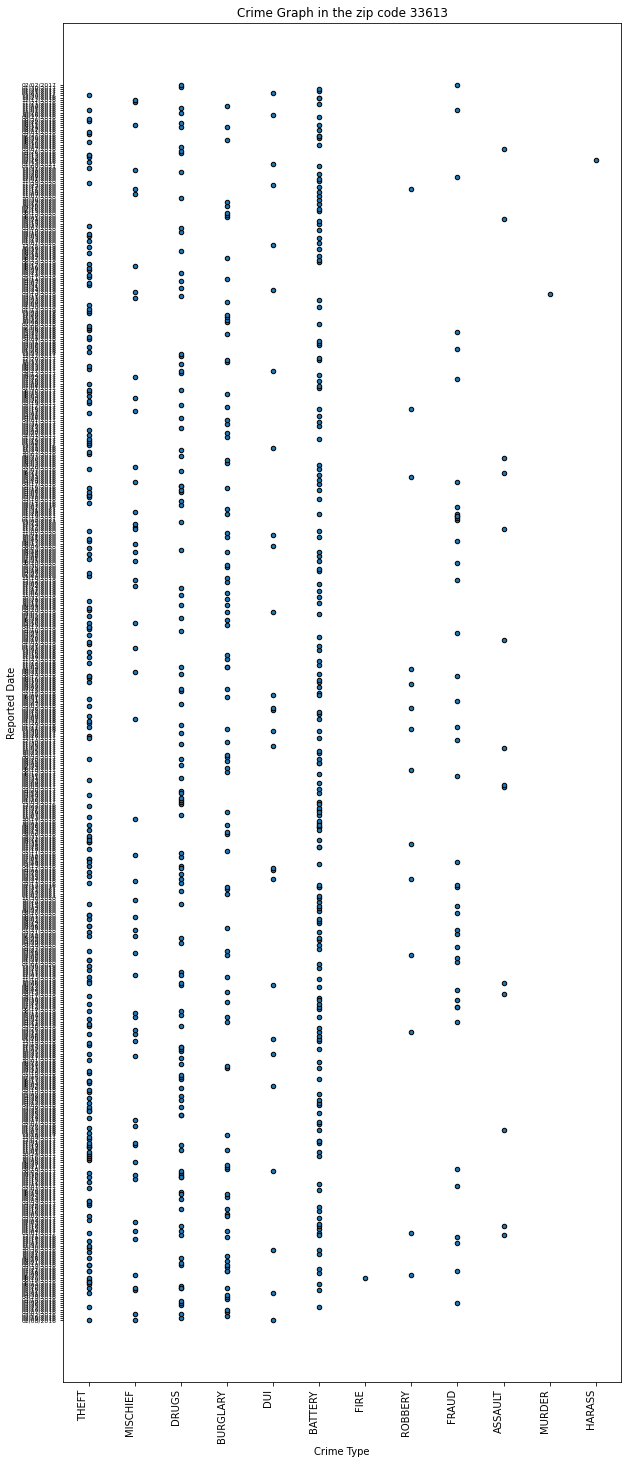

In [8]:
data_crime_no_traffic_df.plot(kind="scatter", x="Crime Type", y="Reported Date", figsize=(10,25),
                              facecolors="red", edgecolors="black", title="Crime Graph in the zip code 33613")
plt.xticks(rotation=90,  horizontalalignment='right', fontweight='light', fontsize='medium',)
plt.yticks(horizontalalignment='right', fontweight='light', fontsize=6)
plt.show()